In [1]:
import os
os.chdir('../')
os.getcwd()

'/scratch/users/nnayal17/attention_long_tail/paying-attention-to-the-long-tail'

In [40]:
import json
import PIL
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm.notebook import tqdm

In [8]:
with open('data/imagenet_class_names.json', 'rb') as f:
    class_names = json.load(f)

In [9]:
class_names

['tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead shark',
 'electric ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house finch',
 'junco',
 'indigo bunting',
 'American robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'American dipper',
 'kite',
 'bald eagle',
 'vulture',
 'great grey owl',
 'fire salamander',
 'smooth newt',
 'newt',
 'spotted salamander',
 'axolotl',
 'American bullfrog',
 'tree frog',
 'tailed frog',
 'loggerhead sea turtle',
 'leatherback sea turtle',
 'mud turtle',
 'terrapin',
 'box turtle',
 'banded gecko',
 'green iguana',
 'Carolina anole',
 'desert grassland whiptail lizard',
 'agama',
 'frilled-necked lizard',
 'alligator lizard',
 'Gila monster',
 'European green lizard',
 'chameleon',
 'Komodo dragon',
 'Nile crocodile',
 'American alligator',
 'triceratops',
 'worm snake',
 'ring-necked snake',
 'eastern hog-nosed snake',
 'smooth green snake',
 'kingsnake',
 'garter snake',
 'water snake',
 'vin

In [12]:
with open('data/ImageNet_LT_train.json', 'rb') as f:
    train_data = json.load(f)

In [17]:
img  = Image.open(train_data['annotations'][0]['fpath'])


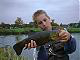

In [21]:
img.convert('RGB')

In [24]:
img_np = np.array(img)

In [26]:
img_np.shape

(60, 80, 3)

In [33]:
imgs = []
paths = []
for i in tqdm(range(len(train_data['annotations']))):
    img = Image.open(train_data['annotations'][i]['fpath'])
    img_np = np.array(img)
    if len(img_np.shape) < 3:
        imgs.append(img)
        paths.append(train_data['annotations'][i])
        break

In [35]:
img = imgs[0]

In [42]:
img_rgb = img.convert('RGB')

In [44]:
img_np = np.array(img_rgb)

In [45]:
img_np.shape

(335, 500, 3)

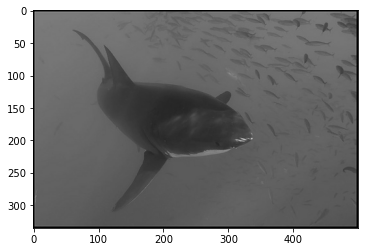

In [46]:
plt.imshow(img_np)

In [11]:
train_data.keys()

dict_keys(['annotations', 'num_classes'])

In [9]:
len(train_data['annotations'])

115846

In [13]:
train_data['annotations'][0]

{'image_id': 0,
 'category_id': 0,
 'fpath': '/datasets/ImageNet/ILSVRC/Data/CLS-LOC/train/n01440764/n01440764_190.JPEG'}

In [10]:
with open('data/ImageNet_LT_val.json', 'rb') as f:
    valid_data = json.load(f)

In [11]:
len(valid_data['annotations'])

50000

In [57]:
import json
import numpy as np
from PIL import Image
from torch.utils.data import Dataset


class ImageNetLTDataset(Dataset):
    
    train_data_info_path = 'data/ImageNet_LT_train.json'
    valid_data_info_path = 'data/ImageNet_LT_val.json'
    
    def __init__(self, mode='train', transforms=None):
        
        self.transforms = transforms
        self.data_info_path = self.train_data_info_path if mode == 'train' else self.valid_data_info_path
        
        with open(self.data_info_path, 'rb') as f:
            data_info = json.load(f)
            
        self.num_classes = data_info['num_classes']
        self.annotations = data_info['annotations']
        self.data_size = len(self.annotations)
        
        per_class_frequency = np.zeros(self.num_classes)
        
        for a in self.annotations:
            label = a['category_id']
            per_class_frequency[label] += 1
            
        self.per_class_frequency = per_class_frequency
        
        ordered_classes = [(i, val) for i, val in enumerate(self.per_class_frequency)]
        ordered_classes.sort(key=lambda x: -x[1])
        self.ordered_classes = np.array([i  for (i, val) in ordered_classes])
    
    def __len__(self):
        return self.data_size
    
    def __getitem__(self, index):
        
        img_path = self.annotations[index]['fpath']
        label = self.annotations[index]['category_id']
        img = Image.open(img_path)
        
        if self.transforms:
            img = self.transforms(img)
            
        return img, label
        

In [49]:
import matplotlib.pyplot as plt
from torchvision import transforms

In [50]:
train_transforms = transforms.Compose([
    transforms.RandAugment(num_ops=2, magnitude=10),
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [58]:
train_dataset = ImageNetLTDataset(mode='train', transforms=train_transforms)

In [24]:
img, label = train_dataset[20000]

In [18]:
img.shape, label

(torch.Size([3, 224, 224]), 160)

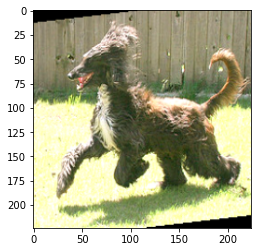

In [19]:
plt.imshow(img.permute(1, 2, 0))

In [52]:
per_class_frequency = train_dataset.per_class_frequency

<BarContainer object of 1000 artists>

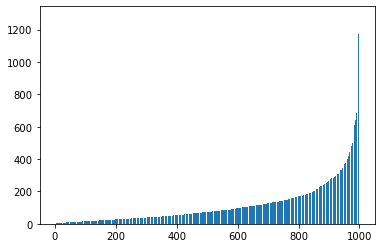

In [32]:
plt.bar(np.arange(1000), np.sort(per_class_frequency))

In [34]:
np.array(np.array(np.zeros(10)))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [59]:
ordered_classes = train_dataset.ordered_classes

In [70]:
cal = per_class_frequency[ordered_classes]

In [73]:
cal.min()

5.0

In [74]:
len(cal)

1000

<BarContainer object of 1000 artists>

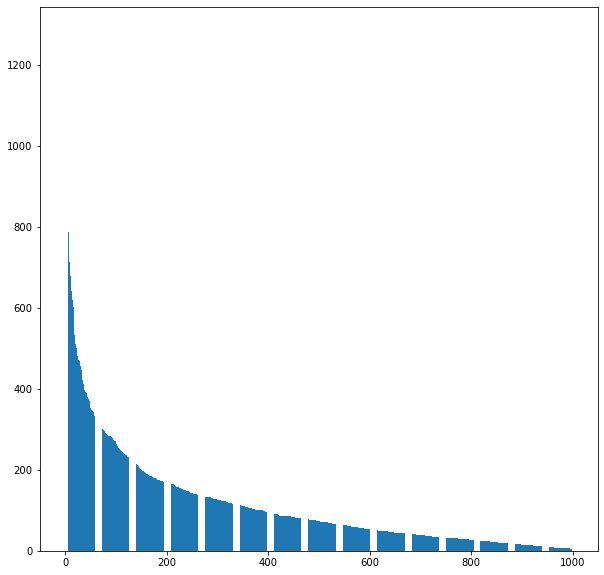

In [75]:
plt.figure(figsize=(10, 10))
plt.bar(np.arange(1000), cal)

In [66]:
len(np.unique(ordered_classes))

1000

In [68]:
ordered_classes.max()

999

In [63]:
per_class_frequency.max()

1280.0